In [1]:
# import packages and set plot settings
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import tree
from sklearn import cross_validation
from sklearn import metrics
from sklearn import ensemble
from numpy import float32

In [2]:
# load the datasets
user_history = pd.read_csv('user_fulfillment_history.csv')
weekly_orders = pd.read_csv('weekly_orders.csv')
weekly_user_pop = pd.read_csv('weekly_user_population.csv').drop_duplicates()

In [4]:
# calculate average value of was_shipped per week
# continuously decreasing pattern as seen in the data exploration
average = user_history.groupby('week_index').agg({'was_shipped': np.mean, 'week_index': np.size})
average

,was_shipped,week_index
week_index,,
1,0.705307,162973
2,0.488050,162973
3,0.377989,162973
4,0.317537,162973
5,0.279703,162973
6,0.249231,162973
7,0.238905,162973
8,0.226866,162973
9,0.210918,162973


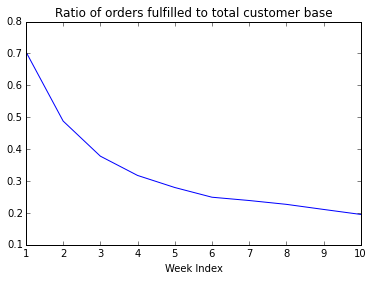

In [5]:
# plot it for visual effects
plt.plot(range(1,11,1),average.was_shipped.values)
plt.title('Ratio of orders fulfilled to total customer base');
plt.xlabel('Week Index')

In [7]:
# Isolate the fields to use for modeling
# Research later - why doesn't DecisionTreeClassifier accept series? I had to explicitly convert to avoid error
index_var = pd.DataFrame(user_history.week_index)
target = pd.DataFrame(user_history.was_shipped)

In [8]:
# check the correlation coeficient, it should be negative
# yup matches expectations
r_row, p_value = pearsonr(index_var,target)
print r_row
print p_value

[-0.27982505]
[ 0.]


In [9]:
# Build a quick decision tree
index_model = tree.DecisionTreeClassifier().fit(index_var, target)

In [10]:
# Look at model fit on train dataset
# Ugh not good, but that's not unexpected. The true positive identificaiton is especially bad.
predicted = index_model.predict(index_var)
print(metrics.classification_report(target, predicted))

             precision    recall  f1-score   support

          0       0.71      0.96      0.82   1093591
          1       0.71      0.21      0.33    536139

avg / total       0.71      0.71      0.66   1629730



In [16]:
# Calculate a running sum of shipped orders so I can create a ratio
user_history['running_sum'] = np.cumsum(user_history.sort(['user_id','week_index']).groupby('user_id')['was_shipped'], axis=0)

In [17]:
# check the data
user_history.sort(['user_id','week_index']).head(50)

,user_id,week_index,was_shipped,running_sum
941103,00001393559769254728083c843a57f5fd1b9ac1,1,0,0
280293,00001393559769254728083c843a57f5fd1b9ac1,2,1,1
979285,00001393559769254728083c843a57f5fd1b9ac1,3,1,2
749909,00001393559769254728083c843a57f5fd1b9ac1,4,1,3
471087,00001393559769254728083c843a57f5fd1b9ac1,5,1,4
713083,00001393559769254728083c843a57f5fd1b9ac1,6,0,4
1489820,00001393559769254728083c843a57f5fd1b9ac1,7,0,4
737226,00001393559769254728083c843a57f5fd1b9ac1,8,0,4
405986,00001393559769254728083c843a57f5fd1b9ac1,9,0,4
355265,00001393559769254728083c843a57f5fd1b9ac1,10,0,4


In [18]:
# Calculate ratio of shipped orders over the user age
# A higher ratio should indicate a higher change of ordering again
# IMPORTANT - Calculations are shifted by 1 row so the ratio for a given week is based on orders from previous weeks
# This allows me to build a model off of each row of data
def my_func(df):
    # Converting to float32 because DecisionTree will not accept float64
    df['ratio'] = (df['running_sum'].shift(1) / df['week_index'].shift(1)).astype(float32)
    return df

user_history = user_history.sort(['user_id','week_index']).groupby('user_id').apply(my_func)

In [19]:
# check the data
user_history.sort(['user_id','week_index']).head(50)

,user_id,week_index,was_shipped,running_sum,ratio
941103,00001393559769254728083c843a57f5fd1b9ac1,1,0,0,NaN
280293,00001393559769254728083c843a57f5fd1b9ac1,2,1,1,0.000000
979285,00001393559769254728083c843a57f5fd1b9ac1,3,1,2,0.500000
749909,00001393559769254728083c843a57f5fd1b9ac1,4,1,3,0.666667
471087,00001393559769254728083c843a57f5fd1b9ac1,5,1,4,0.750000
713083,00001393559769254728083c843a57f5fd1b9ac1,6,0,4,0.800000
1489820,00001393559769254728083c843a57f5fd1b9ac1,7,0,4,0.666667
737226,00001393559769254728083c843a57f5fd1b9ac1,8,0,4,0.571429
405986,00001393559769254728083c843a57f5fd1b9ac1,9,0,4,0.500000
355265,00001393559769254728083c843a57f5fd1b9ac1,10,0,4,0.444444


In [20]:
# Restrict the data to only weeks 3 and above
# There will less variety for weeks 1 and 2 and therefore less predictive power so I'd want to investigate further
# For now, weeks 3 and above are fine for exploration
user_history_3plus = user_history[user_history['week_index']>2]

In [21]:
user_history_3plus

,user_id,week_index,was_shipped,running_sum,ratio
979285,00001393559769254728083c843a57f5fd1b9ac1,3,1,2,0.500000
749909,00001393559769254728083c843a57f5fd1b9ac1,4,1,3,0.666667
471087,00001393559769254728083c843a57f5fd1b9ac1,5,1,4,0.750000
713083,00001393559769254728083c843a57f5fd1b9ac1,6,0,4,0.800000
1489820,00001393559769254728083c843a57f5fd1b9ac1,7,0,4,0.666667
737226,00001393559769254728083c843a57f5fd1b9ac1,8,0,4,0.571429
405986,00001393559769254728083c843a57f5fd1b9ac1,9,0,4,0.500000
355265,00001393559769254728083c843a57f5fd1b9ac1,10,0,4,0.444444
1613421,00001d7763e384d1098e7bcc3d85059fe26e6cc4,3,1,3,1.000000
108799,00001d7763e384d1098e7bcc3d85059fe26e6cc4,4,1,4,1.000000


In [22]:
# check the correlation between my new ratio and the target
# Much stronger positive correlation compared to just the index
r_row, p_value = pearsonr(user_history_3plus['ratio'],user_history_3plus['was_shipped'])
print r_row
print p_value

0.486290964265
0.0


In [23]:
# make sure there are no missings for ratio
user_history_3plus.isnull().sum()

user_id        0
week_index     0
was_shipped    0
running_sum    0
ratio          0
dtype: int64

In [24]:
# Split the dataset into train and test
user_history_train, user_history_test = cross_validation.train_test_split(user_history_3plus, test_size = 0.2)
print user_history_train.shape
print user_history_test.shape

(1043027, 5)
(260757, 5)


In [25]:
# Pulling out columns for DecisionTree, as above make sure to research this later
both_inputs = ['ratio','week_index']
both_vars = pd.DataFrame(user_history_train[both_inputs])
target_3plus = pd.DataFrame(user_history_train.was_shipped)
inputs_test = pd.DataFrame(user_history_test[both_inputs])
test_target = pd.DataFrame(user_history_test.was_shipped)

In [26]:
ratio_model = tree.DecisionTreeClassifier().fit(both_vars, target_3plus)

In [27]:
# Look at prediction for test dataset
# Much better than just week_index although still not great
predicted_ratio = ratio_model.predict(inputs_test)
print(metrics.classification_report(test_target, predicted_ratio))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87    192308
          1       0.65      0.50      0.57     68449

avg / total       0.79      0.80      0.79    260757



In [32]:
# Try gradient boosting, on only two variables this should be the same as a decisiontree
# Research further - unlike Tree, GradientBoostingClassifier seems to not accept a DataFrame. Why would they differ?
new_y = target_3plus.was_shipped.values
gbm = ensemble.GradientBoostingClassifier(n_estimators=300, learning_rate=1.0,
                                          max_depth=2, random_state=0).fit(both_vars, new_y)

In [33]:
# Identical results as expected
predicted_gbm = gbm.predict(inputs_test)
print(metrics.classification_report(test_target, predicted_gbm))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87    192308
          1       0.65      0.50      0.57     68449

avg / total       0.79      0.80      0.79    260757



In [34]:
# calculate probablities for all models
# IMPORTANT - the model built only on the index was trained on the entire dataset
# This is not a fair comparison but we already know the index_model is not good so this will give a frame of reference
# Fine for exploratory reasons, but should not make definite claims off of this analysis
index_pred = index_model.predict_proba(index_var)
index_fpr, index_tpr, index_thresholds = metrics.roc_curve(target,index_pred[:, 1])
ratio_pred = ratio_model.predict_proba(inputs_test)
ratio_fpr, ratio_tpr, ratio_thresholds = metrics.roc_curve(test_target,ratio_pred[:, 1])
gbm_pred = gbm.predict_proba(inputs_test)
gbm_fpr, gbm_tpr, gbm_thresholds = metrics.roc_curve(test_target,gbm_pred[:, 1])

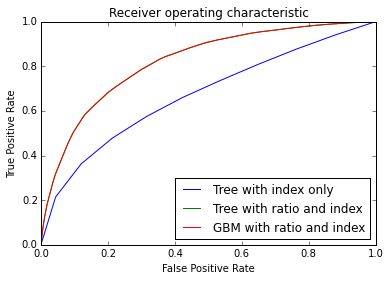

In [35]:
# create a plot
plt.plot(index_fpr, index_tpr, label='Tree with index only')
plt.plot(ratio_fpr, ratio_tpr, label='Tree with ratio and index')
plt.plot(gbm_fpr, gbm_tpr, label='GBM with ratio and index')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")